<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/Dreamers_Challege.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load training data
train_data = pd.read_csv('/content/train.csv')
print("Training Data Head:")
print(train_data.head())

# Check for missing values
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

# Check for duplicates
print("Duplicates in Training Data:", train_data.duplicated().sum())

# Split the features and target variable
X = train_data.drop(columns='target')  # Ensure 'target' is the correct column name
y = train_data['target']

# Impute missing values in training data
imputer = SimpleImputer(strategy='mean')  # Choose the strategy that fits your data best
X_imputed = imputer.fit_transform(X)

# Convert the imputed data back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Split the imputed data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Set minimal hyperparameters for fast execution
param_grid = {
    'C': [0.001, 0.01, 0.1],  # Regularization strength
    'solver': ['liblinear'],  # Use 'liblinear' for small datasets
    'max_iter': [50]  # Set maximum iterations for convergence
}

logistic_model = LogisticRegression(random_state=42)

# Grid search for the best hyperparameters
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_logistic_model = grid_search.best_estimator_

# Validate the model
y_pred = best_logistic_model.predict(X_val)
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Load test data
test_data = pd.read_csv('/content/test.csv')
print("Test Data Head:")
print(test_data.head())

# Impute missing values in test data
X_test = test_data.drop(columns='row_id')  # Adjust if necessary based on your test dataset structure
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Make predictions on the test data
test_predictions = best_logistic_model.predict(X_test_imputed)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'row_id': test_data['row_id'],  # Ensure 'row_id' is the correct column name
    'target': test_predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('/content/submission.csv', index=False)
print("Submission saved to 'submission.csv'.")


Training Data Head:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     

In [48]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import numpy as np  # Importing the numpy library for numerical operations
from sklearn.model_selection import train_test_split, GridSearchCV  # Importing functions for splitting datasets and hyperparameter tuning
from sklearn.impute import SimpleImputer  # Importing the SimpleImputer class for handling missing values
from sklearn.linear_model import LogisticRegression  # Importing the LogisticRegression model
from sklearn.metrics import classification_report, accuracy_score  # Importing metrics for model evaluation

# Load training data
train_data = pd.read_csv('/content/train.csv')  # Reading the training data from a CSV file
print("Training Data Head:")  # Print statement to indicate the following output
print(train_data.head())  # Display the first few rows of the training data

# Check for missing values
print("Missing Values in Training Data:")  # Print statement to indicate the following output
print(train_data.isnull().sum())  # Display the count of missing values for each column

# Check for duplicates
print("Duplicates in Training Data:", train_data.duplicated().sum())  # Print the number of duplicate rows in the dataset

# Split the features and target variable
X = train_data.drop(columns='target')  # Dropping the target column from the features
y = train_data['target']  # Assigning the target column to the variable y

# Impute missing values in training data
imputer = SimpleImputer(strategy='mean')  # Creating an imputer to replace missing values with the mean of the column
X_imputed = imputer.fit_transform(X)  # Fitting the imputer and transforming the feature data

# Convert the imputed data back to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)  # Creating a DataFrame from the imputed data

# Split the imputed data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)  # Splitting data into train and validation sets

# Set minimal hyperparameters for fast execution
param_grid = {
    'C': [0.001, 0.01, 0.1],  # Regularization strength values for hyperparameter tuning
    'solver': ['liblinear'],  # Specifying 'liblinear' solver for logistic regression
    'max_iter': [50]  # Setting maximum iterations for model convergence
}

logistic_model = LogisticRegression(random_state=42)  # Initializing the logistic regression model with a random state

# Grid search for the best hyperparameters
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid,  # Setting up grid search for hyperparameter tuning
                           cv=3, n_jobs=-1, verbose=2)  # Specifying cross-validation and verbosity level
grid_search.fit(X_train, y_train)  # Fitting the grid search to the training data

# Best model from grid search
best_logistic_model = grid_search.best_estimator_  # Extracting the best logistic regression model from grid search results

# Validate the model
y_pred = best_logistic_model.predict(X_val)  # Making predictions on the validation set
print("Classification Report:")  # Print statement to indicate the following output
print(classification_report(y_val, y_pred))  # Displaying classification report with precision, recall, and f1-score

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)  # Calculating accuracy of the model on validation set
print("Validation Accuracy:", accuracy)  # Printing the validation accuracy

# Load test data
test_data = pd.read_csv('/content/test.csv')  # Reading the test data from a CSV file
print("Test Data Head:")  # Print statement to indicate the following output
print(test_data.head())  # Displaying the first few rows of the test data

# Impute missing values in test data
X_test = test_data.drop(columns='row_id')  # Dropping the 'row_id' column from the test data
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)  # Imputing missing values in test data

# Make predictions on the test data
test_predictions = best_logistic_model.predict(X_test_imputed)  # Making predictions on the imputed test data

# Create a DataFrame for submission
submission = pd.DataFrame({
    'row_id': test_data['row_id'],  # Including 'row_id' for submission
    'target': test_predictions  # Adding predicted target values to the submission DataFrame
})

# Save the submission DataFrame to a CSV file
submission.to_csv('/content/submission.csv', index=False)  # Saving the submission DataFrame to a CSV file without the index
print("Submission saved to 'submission.csv'.")  # Print statement to confirm submission file saving


Training Data Head:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     

Missing Values in Training Data:
timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
target                    0
dtype: int64
Duplicates in Training Data: 0
Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  float64
d

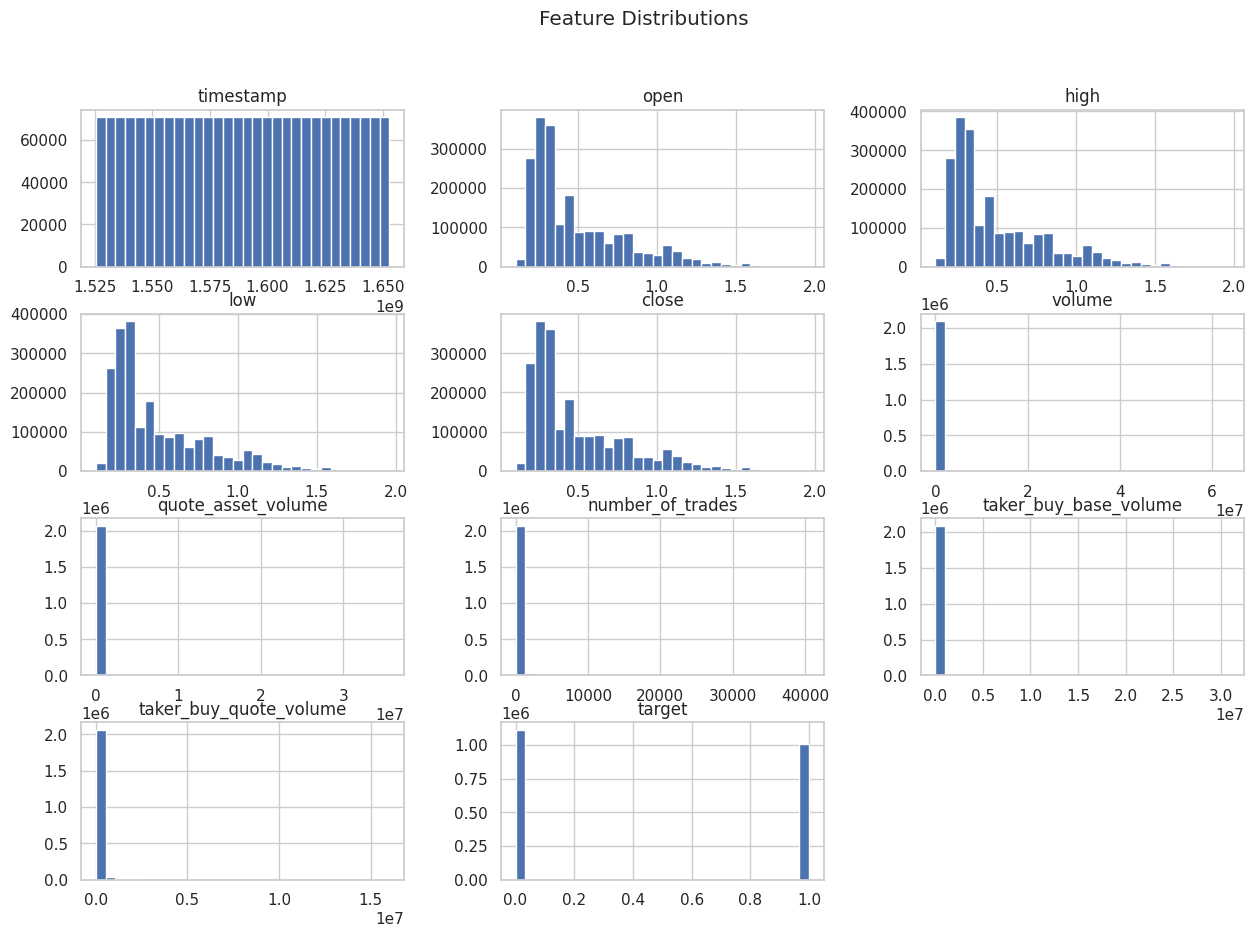

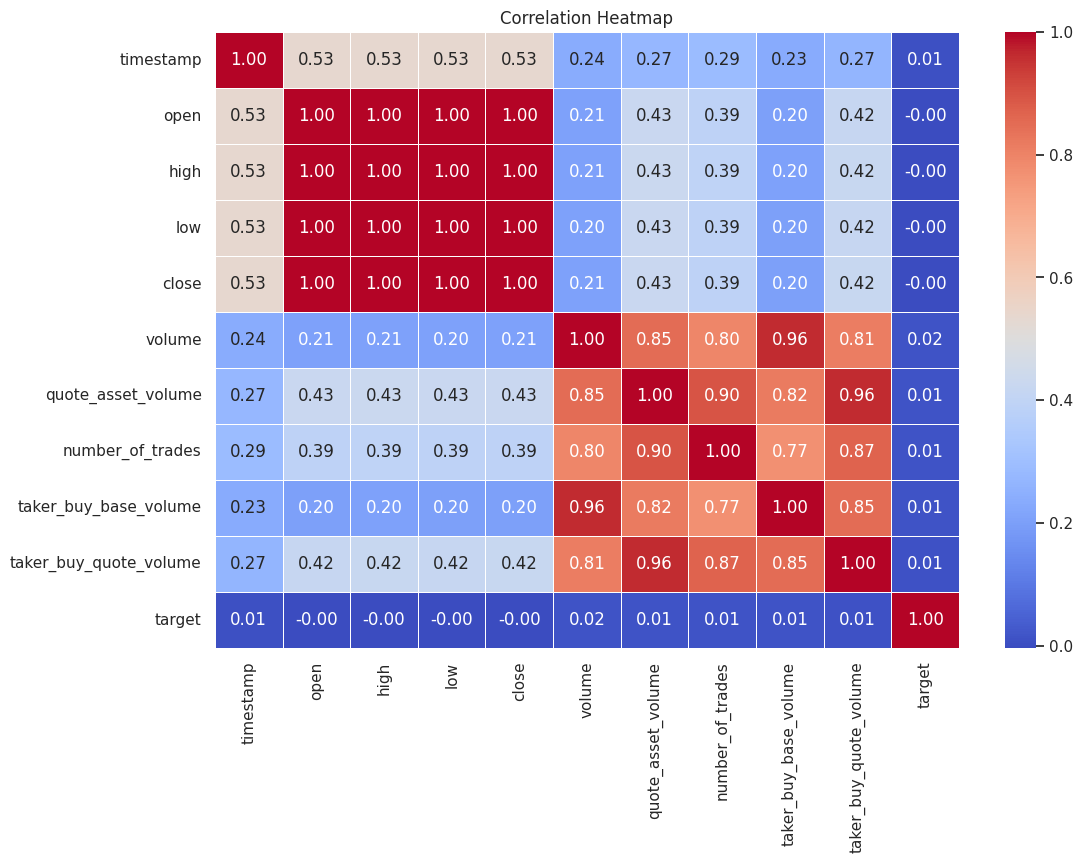

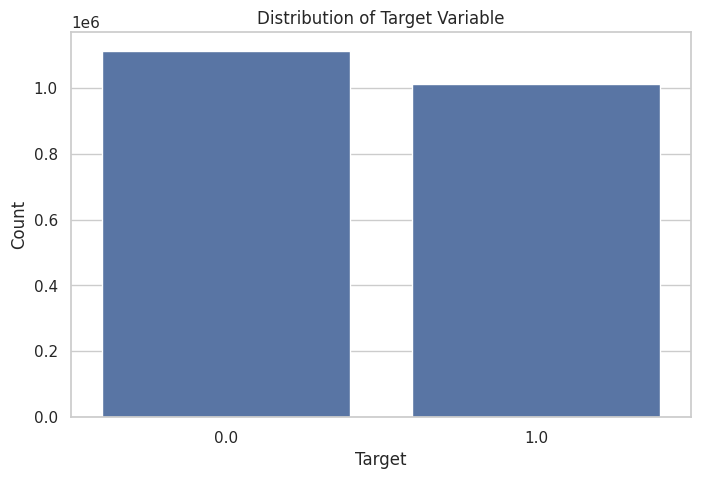

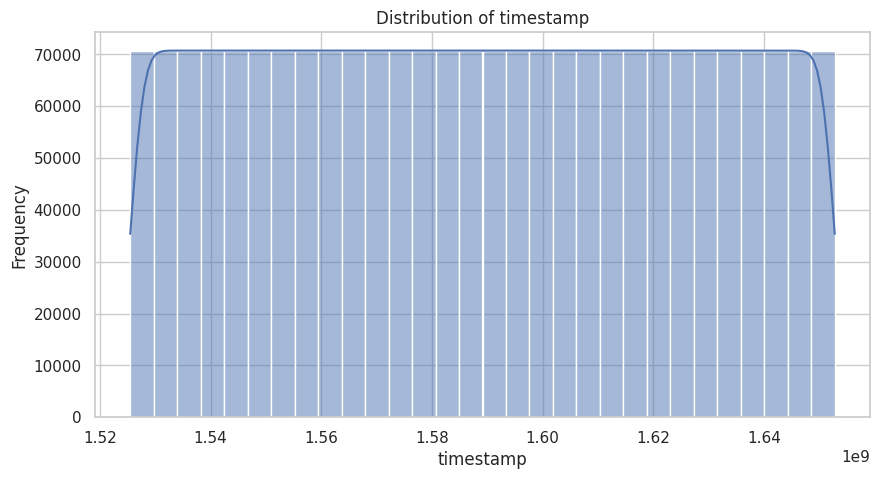

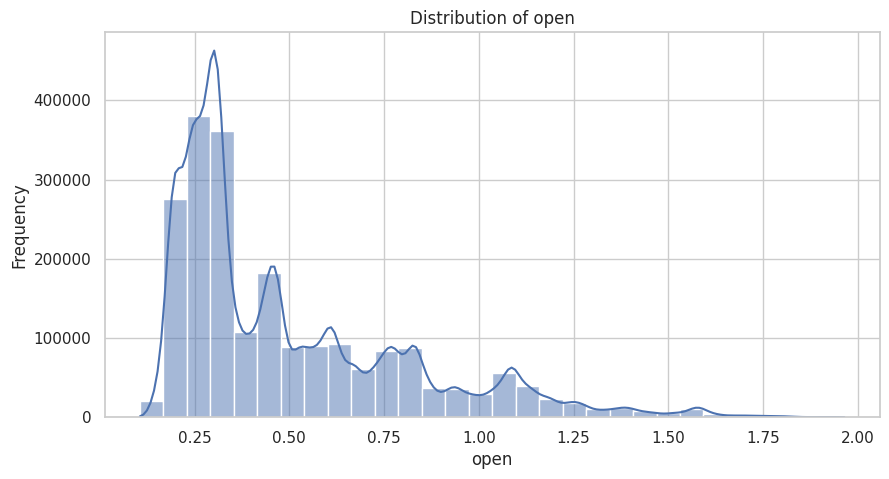

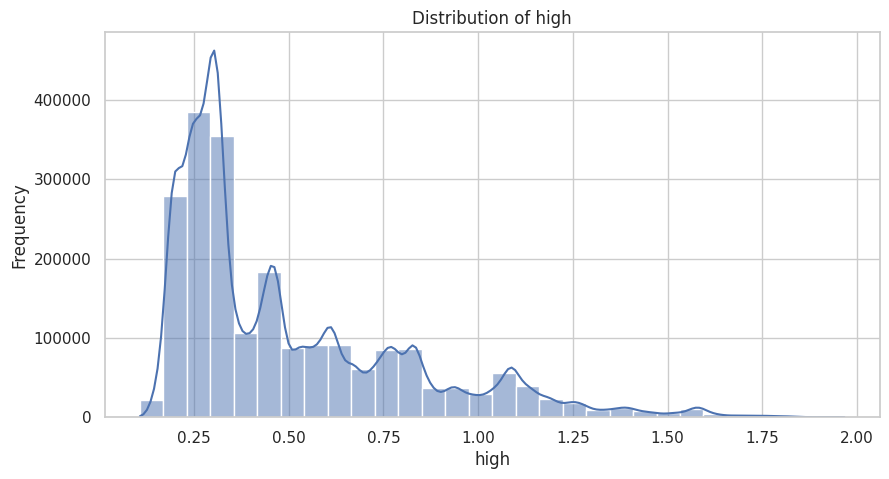

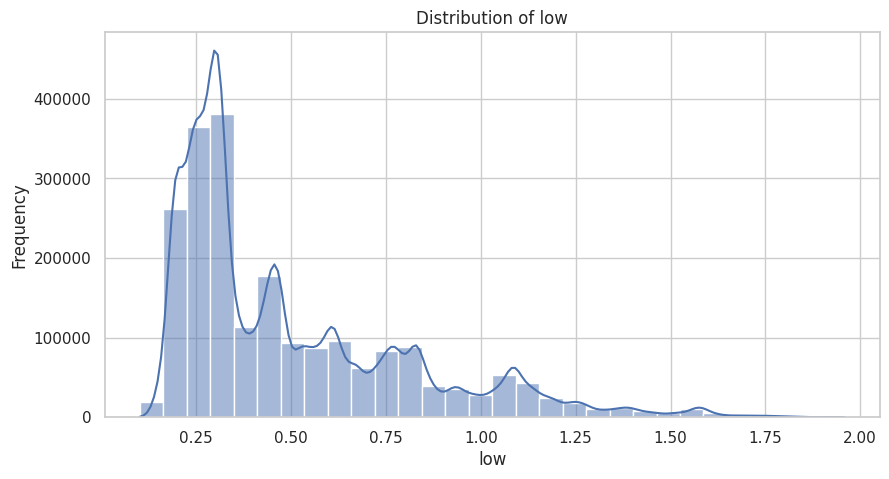

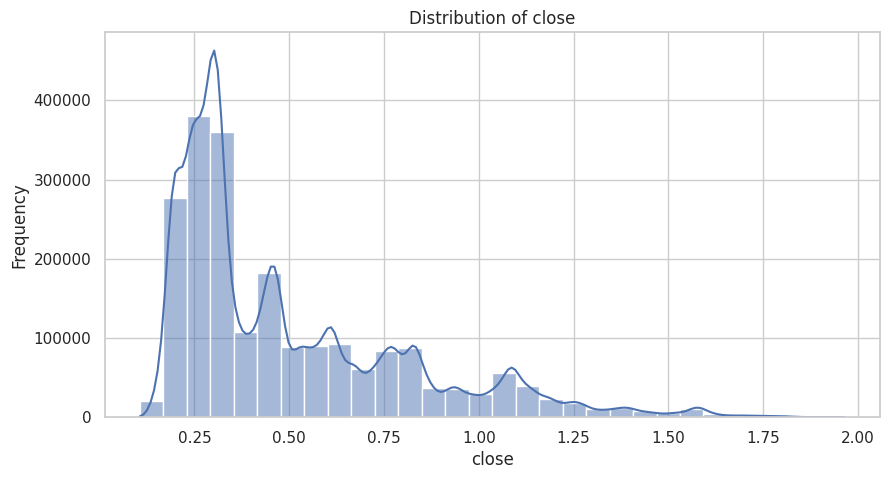

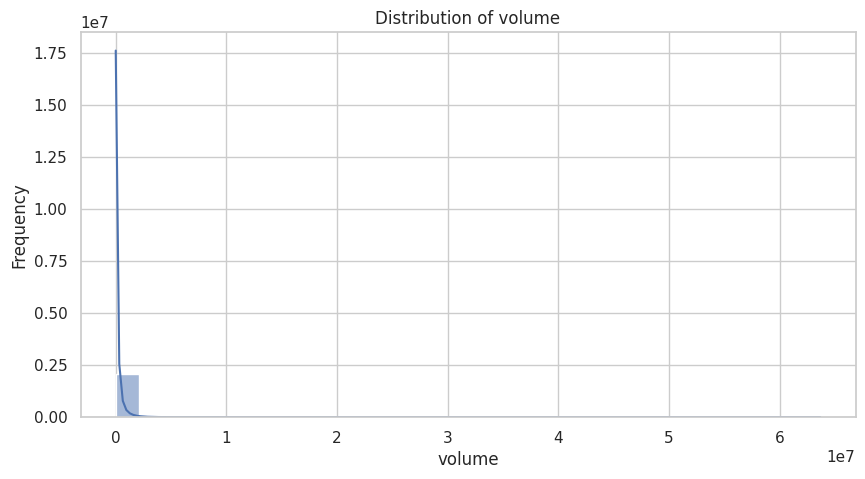

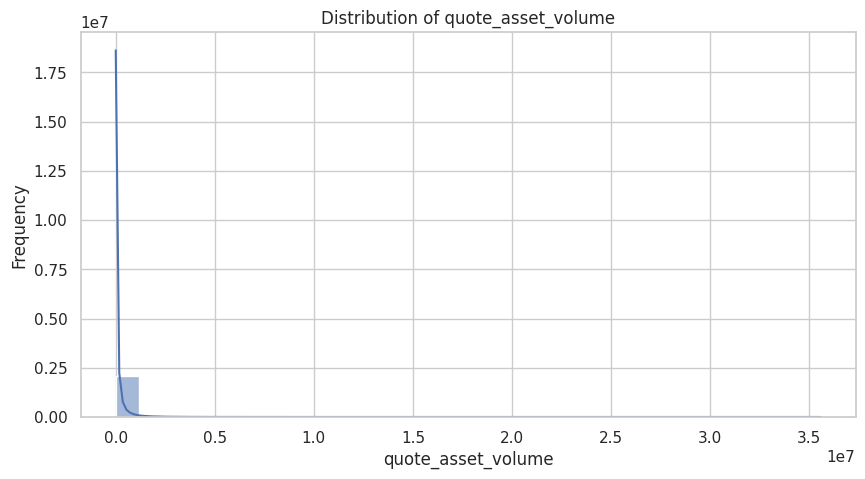

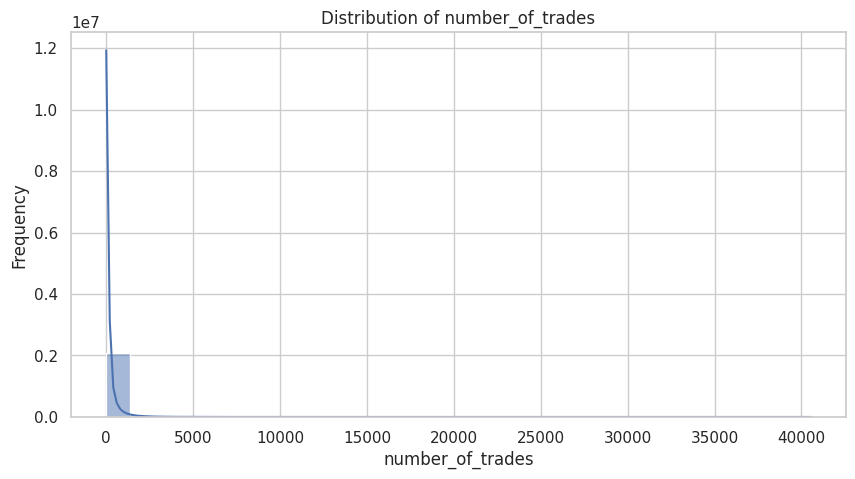

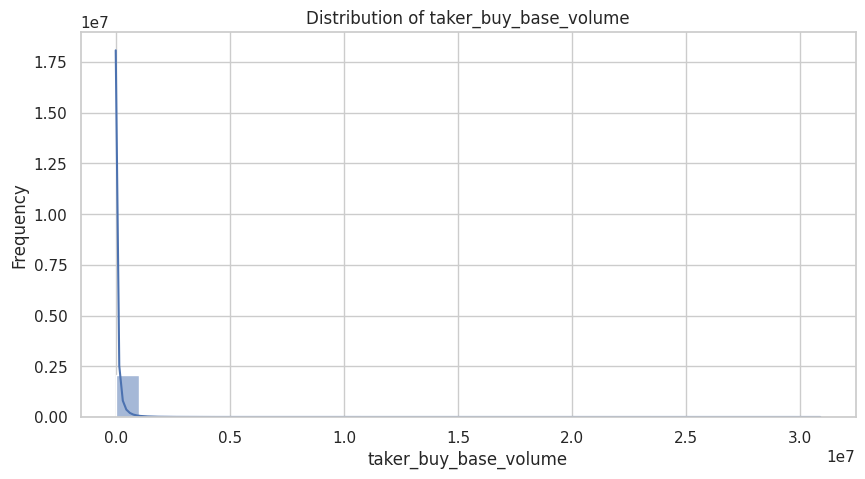

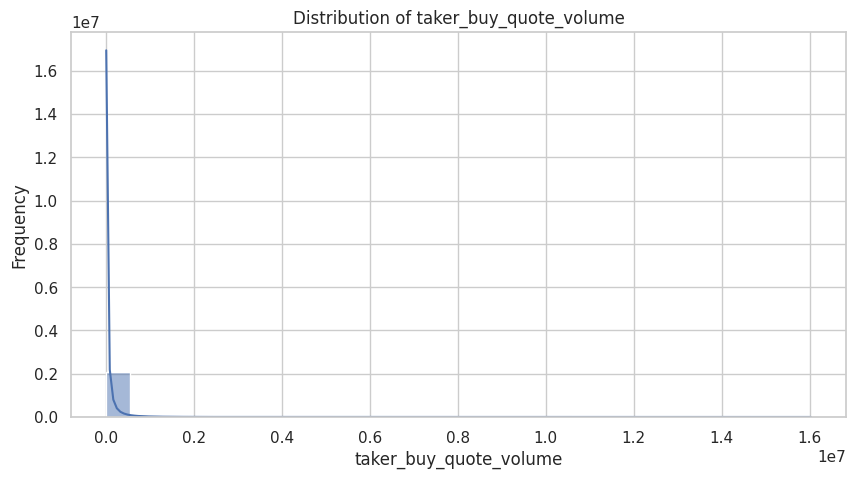

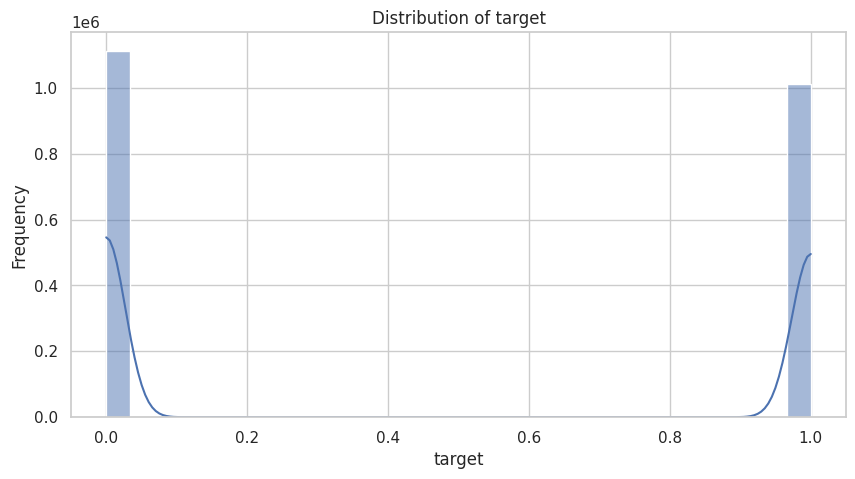

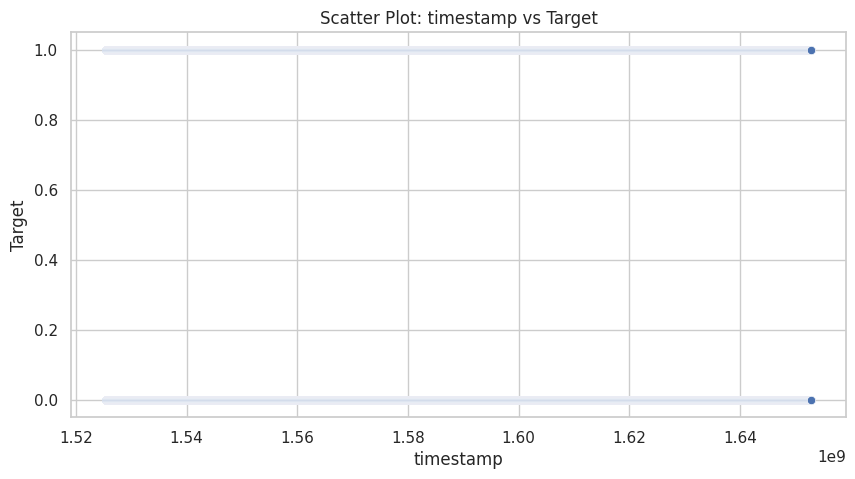

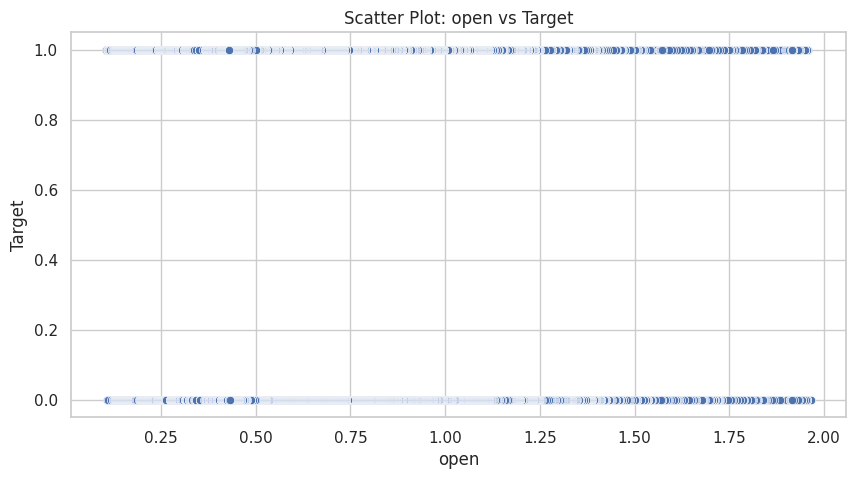

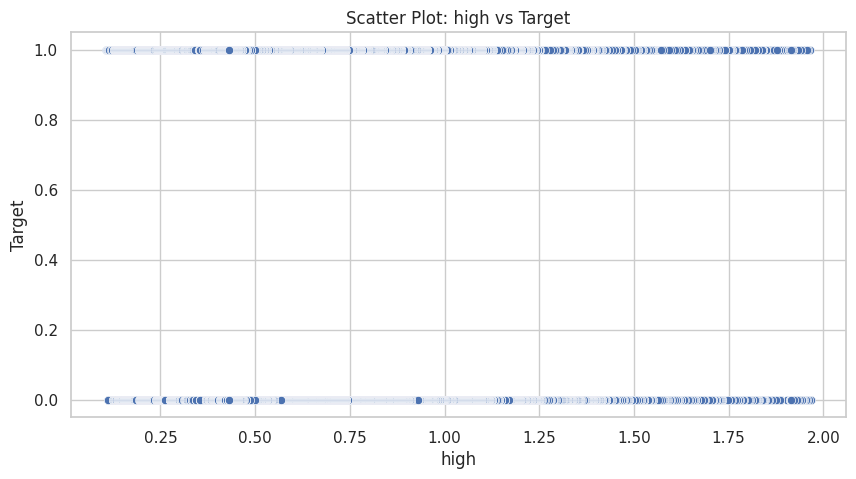

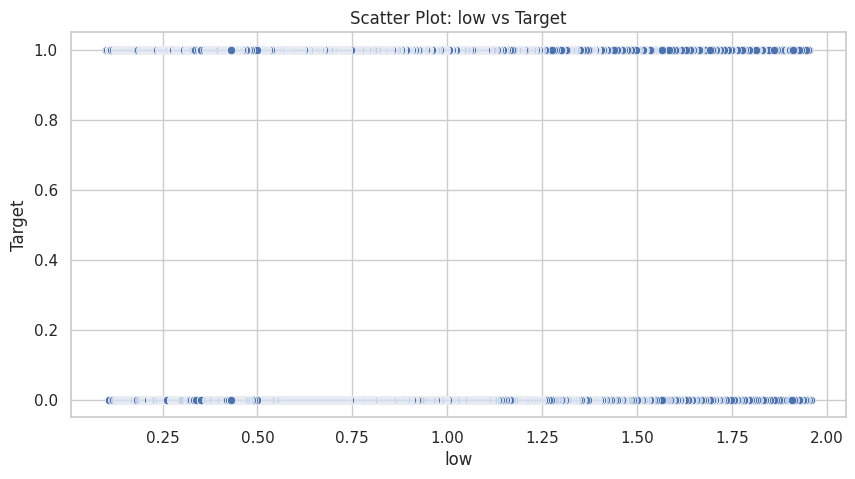

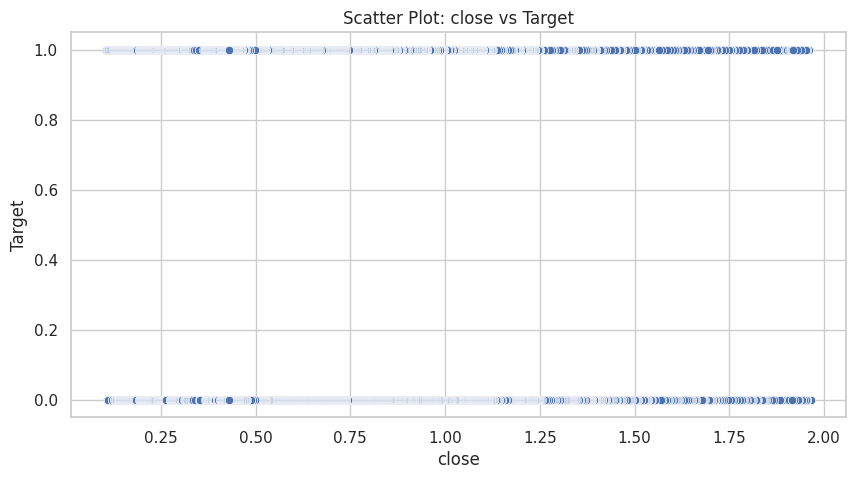

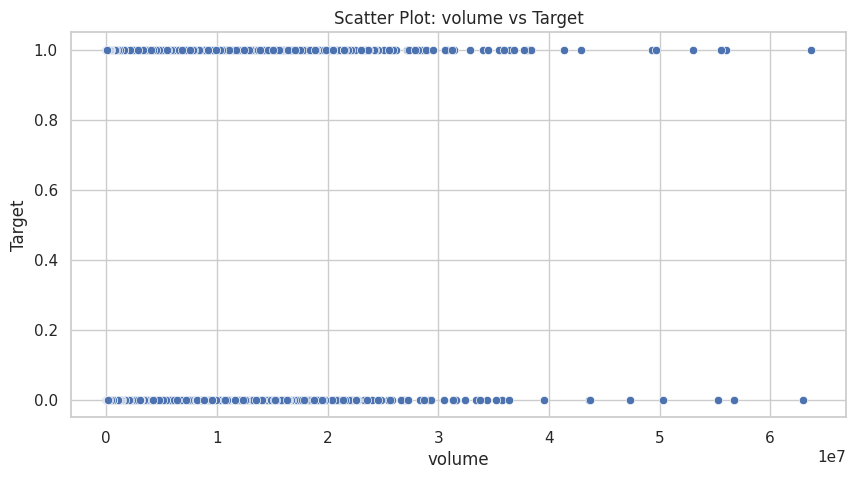

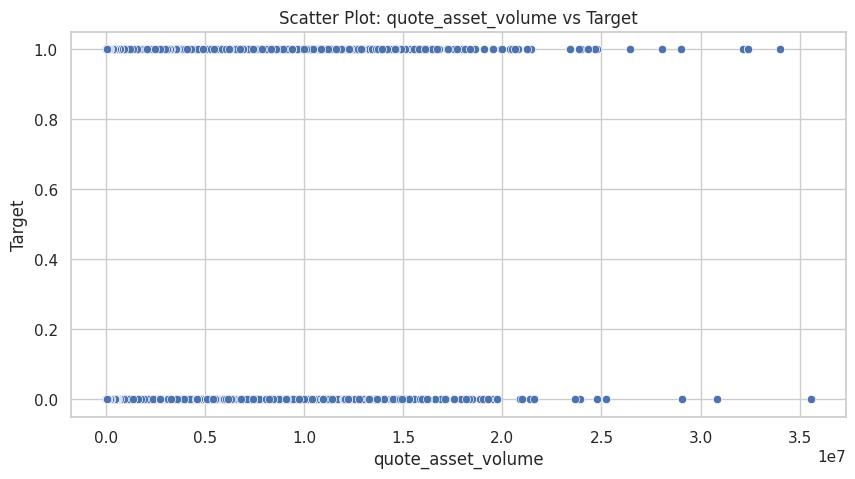

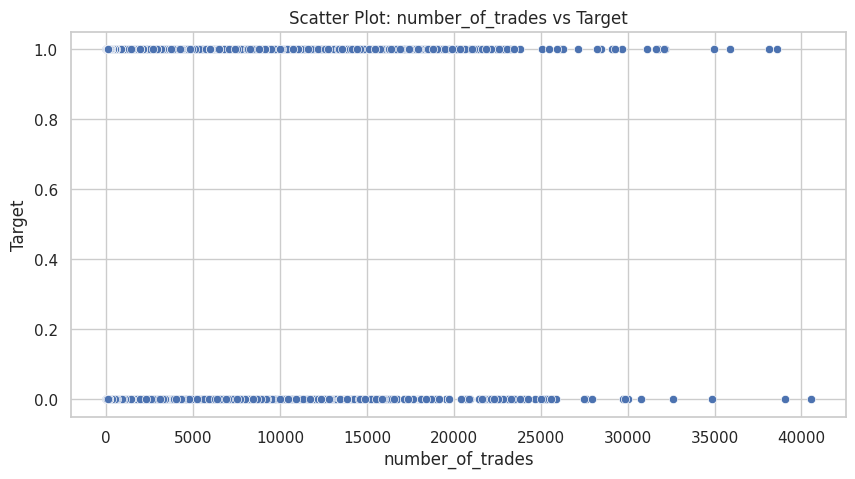

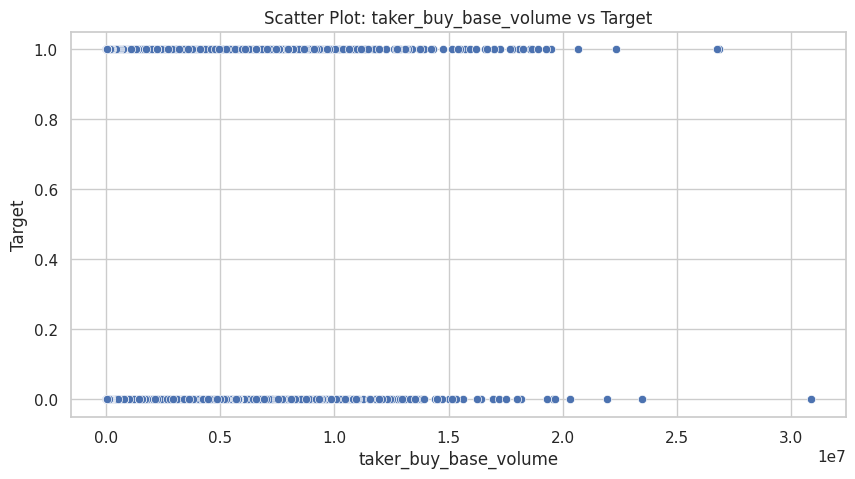

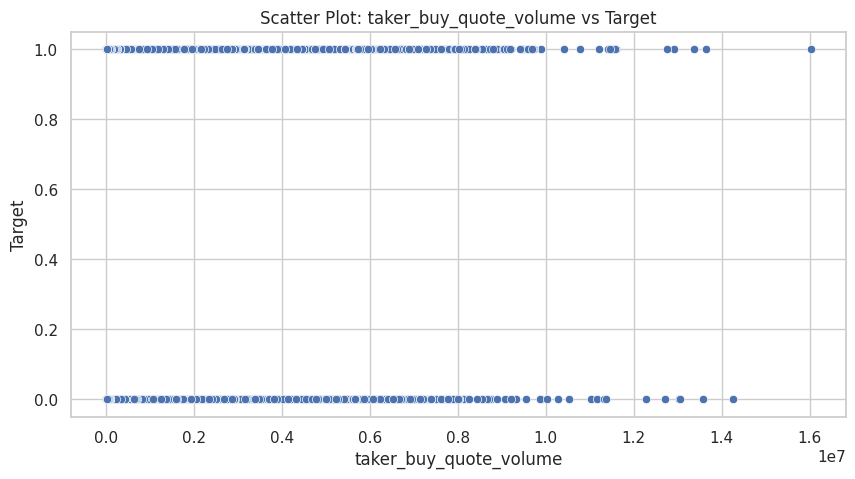

In [50]:


# Check for missing values
print("Missing Values in Training Data:")  # Print statement to indicate the following output
print(train_data.isnull().sum())  # Display the count of missing values for each column

# Check for duplicates
print("Duplicates in Training Data:", train_data.duplicated().sum())  # Print the number of duplicate rows in the dataset

# Inspect data types and basic info
print("Training Data Info:")  # Print statement to indicate the following output
train_data.info()  # Display information about the dataset, including data types and non-null counts

# Descriptive statistics
print("Descriptive Statistics of Training Data:")  # Print statement to indicate the following output
print(train_data.describe())  # Display summary statistics for numerical columns

# Visualize distribution of features
train_data.hist(bins=30, figsize=(15, 10))  # Plot histograms for each numeric feature
plt.suptitle('Feature Distributions')  # Set title for the histograms
plt.show()  # Display the histograms

# Correlation heatmap
plt.figure(figsize=(12, 8))  # Set figure size for the heatmap
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)  # Plotting correlation heatmap
plt.title('Correlation Heatmap')  # Set title for the heatmap
plt.show()  # Display the heatmap

# Visualize target variable distribution
plt.figure(figsize=(8, 5))  # Set figure size for the plot
sns.countplot(x='target', data=train_data)  # Plotting count of target variable classes
plt.title('Distribution of Target Variable')  # Set title for the plot
plt.xlabel('Target')  # Set x-axis label
plt.ylabel('Count')  # Set y-axis label
plt.show()  # Display the plot

# Histogram for each feature (repeated for clarity)
for column in train_data.select_dtypes(include=np.number).columns:  # Loop through numerical columns
    plt.figure(figsize=(10, 5))  # Set figure size for each histogram
    sns.histplot(train_data[column], bins=30, kde=True)  # Plot histogram with kernel density estimate
    plt.title(f'Distribution of {column}')  # Set title for the histogram
    plt.xlabel(column)  # Set x-axis label
    plt.ylabel('Frequency')  # Set y-axis label
    plt.show()  # Display the histogram

# Scatter plots to assess relationships between features and the target variable
feature_columns = train_data.select_dtypes(include=np.number).columns[:-1]  # Get numerical feature columns (excluding target)

for feature in feature_columns:  # Loop through each feature column
    plt.figure(figsize=(10, 5))  # Set figure size for each scatter plot
    sns.scatterplot(x=train_data[feature], y=train_data['target'])  # Create scatter plot of feature vs target
    plt.title(f'Scatter Plot: {feature} vs Target')  # Set title for the scatter plot
    plt.xlabel(feature)  # Set x-axis label
    plt.ylabel('Target')  # Set y-axis label
    plt.show()  # Display the scatter plot



In [51]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # Library based on Matplotlib for statistical data visualization
from sklearn.model_selection import train_test_split  # Function to split data into training and test sets
from sklearn.impute import SimpleImputer  # Class for imputing missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Classes for scaling numerical features and encoding categorical features
from sklearn.compose import ColumnTransformer  # Class for applying different preprocessing steps to different columns
from sklearn.pipeline import Pipeline  # Class for creating a pipeline of data processing steps
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.metrics import classification_report, accuracy_score  # Functions for evaluating model performance
from sklearn.feature_selection import VarianceThreshold  # Class for feature selection based on variance

# Load training data
train_data = pd.read_csv('/content/train.csv')  # Load training data from CSV file
print("Training Data Head:")  # Print statement for header
print(train_data.head())  # Display the first few rows of the training data

# Check for missing values
print("Missing Values in Training Data:")  # Print statement for missing values
print(train_data.isnull().sum())  # Display the count of missing values for each column

# Check for duplicates
duplicates = train_data.duplicated().sum()  # Count the number of duplicate rows
print("Duplicates in Training Data:", duplicates)  # Print the count of duplicates

# Remove duplicates if any
if duplicates > 0:  # Check if there are any duplicates
    train_data = train_data.drop_duplicates()  # Remove duplicate rows from the dataset

# Outlier Detection using IQR
def remove_outliers(df):  # Function to remove outliers based on the IQR method
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()  # Identify numerical features
    for feature in numerical_features:  # Loop through each numerical feature
        Q1 = df[feature].quantile(0.25)  # Calculate the first quartile (25th percentile)
        Q3 = df[feature].quantile(0.75)  # Calculate the third quartile (75th percentile)
        IQR = Q3 - Q1  # Calculate the Interquartile Range (IQR)
        lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound for outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]  # Filter out outliers
    return df  # Return the dataframe without outliers

# Remove outliers
train_data = remove_outliers(train_data)  # Apply the outlier removal function to the training data

# Split features and target variable
X = train_data.drop(columns='target')  # Split features (X) by dropping the target column
y = train_data['target']  # Define the target variable (y)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()  # List numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # List categorical features

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[  # Create a pipeline for numerical features
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('feature_selection', VarianceThreshold(threshold=0.1))  # Remove low variance features
])

categorical_pipeline = Pipeline(steps=[  # Create a pipeline for categorical features
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(  # Create a column transformer to apply different transformations
    transformers=[  # List of transformations to apply
        ('num', numerical_pipeline, numerical_features),  # Apply numerical pipeline to numerical features
        ('cat', categorical_pipeline, categorical_features)  # Apply categorical pipeline to categorical features
    ]
)

# Create a logistic regression model pipeline
pipeline = Pipeline(steps=[  # Create a pipeline for the entire model
    ('preprocessor', preprocessor),  # Include the preprocessing step
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=100))  # Logistic Regression model
])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into train and validation sets

# Fit the model on the training data
pipeline.fit(X_train, y_train)  # Train the model using the training data

# Validate the model
y_pred = pipeline.predict(X_val)  # Make predictions on the validation set
print("Classification Report:")  # Print statement for classification report
print(classification_report(y_val, y_pred))  # Display the classification report

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy of the model
print("Validation Accuracy:", accuracy)  # Print the accuracy score

# Load test data
test_data = pd.read_csv('/content/test.csv')  # Load test data from CSV file
print("Test Data Head:")  # Print statement for header
print(test_data.head())  # Display the first few rows of the test data

# Preprocess test data using the same pipeline
test_predictions = pipeline.predict(test_data.drop(columns='row_id'))  # Predict on test data without 'row_id' column

# Create a DataFrame for submission
submission = pd.DataFrame({  # Create a DataFrame for submission
    'row_id': test_data['row_id'],  # Ensure 'row_id' is the correct column name from test data
    'target': test_predictions  # Include the predicted target values
})

# Save the submission DataFrame to a CSV file
submission.to_csv('/content/submission.csv', index=False)  # Save the submission to a CSV file
print("Submission saved to 'submission.csv'.")  # Print statement confirming submission saved



Training Data Head:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     

In [53]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
from sklearn.model_selection import train_test_split  # Function for splitting data
from sklearn.impute import SimpleImputer  # Class for imputing missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Classes for scaling and encoding features
from sklearn.compose import ColumnTransformer  # Class for applying different preprocessing to different columns
from sklearn.pipeline import Pipeline  # Class for creating a pipeline of data processing steps
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import classification_report, accuracy_score, f1_score  # Functions for evaluating model performance

# Load training data
train_data = pd.read_csv('/content/train.csv')  # Load training data from CSV file
print("Training Data Head:")  # Print statement for header
print(train_data.head())  # Display the first few rows of the training data

# Check for missing values
print("Missing Values in Training Data:")  # Print statement for missing values
print(train_data.isnull().sum())  # Display the count of missing values for each column

# Remove duplicates if any
train_data = train_data.drop_duplicates()  # Remove duplicate rows from the dataset

# Split features and target variable
X = train_data.drop(columns='target')  # Split features (X) by dropping the target column
y = train_data['target']  # Define the target variable (y)

# Limit the size of the dataset for faster execution
X, _, y, _ = train_test_split(X, y, test_size=0.9, random_state=42)  # Reduce dataset size to 10%

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()  # List numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # List categorical features

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[  # Create a pipeline for numerical features
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
])

categorical_pipeline = Pipeline(steps=[  # Create a pipeline for categorical features
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(  # Create a column transformer to apply different transformations
    transformers=[  # List of transformations to apply
        ('num', numerical_pipeline, numerical_features),  # Apply numerical pipeline to numerical features
        ('cat', categorical_pipeline, categorical_features)  # Apply categorical pipeline to categorical features
    ]
)

# Create a Logistic Regression model pipeline
pipeline = Pipeline(steps=[  # Create a pipeline for the entire model
    ('preprocessor', preprocessor),  # Include the preprocessing step
    ('classifier', LogisticRegression(max_iter=3, random_state=42))  # Logistic Regression model with fewer iterations
])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data into train and validation sets

# Fit the model on training data
pipeline.fit(X_train, y_train)  # Fit the pipeline to the training data

# Validate the model
y_pred = pipeline.predict(X_val)  # Make predictions on the validation set
print("Classification Report:")  # Print statement for classification report
print(classification_report(y_val, y_pred))  # Display the classification report

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy of the model
print("Validation Accuracy:", accuracy)  # Print the accuracy score

# Calculate and print the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')  # Calculate the weighted F1 score
print("F1 Score:", f1)  # Print the F1 score

# Load test data
test_data = pd.read_csv('/content/test.csv')  # Load test data from CSV file
print("Test Data Head:")  # Print statement for header
print(test_data.head())  # Display the first few rows of the test data

# Preprocess test data using the same pipeline
test_predictions = pipeline.predict(test_data.drop(columns='row_id'))  # Predict on test data without 'row_id' column

# Create a DataFrame for submission
submission = pd.DataFrame({  # Create a DataFrame for submission
    'row_id': test_data['row_id'],  # Ensure 'row_id' is the correct column name from test data
    'target': test_predictions  # Include the predicted target values
})

# Save the submission DataFrame to a CSV file
submission.to_csv('/content/submission.csv', index=False)  # Save the submission to a CSV file
print("Submission saved to 'submission.csv'.")  # Print statement confirming submission saved


Training Data Head:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     

Training Data Head:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     

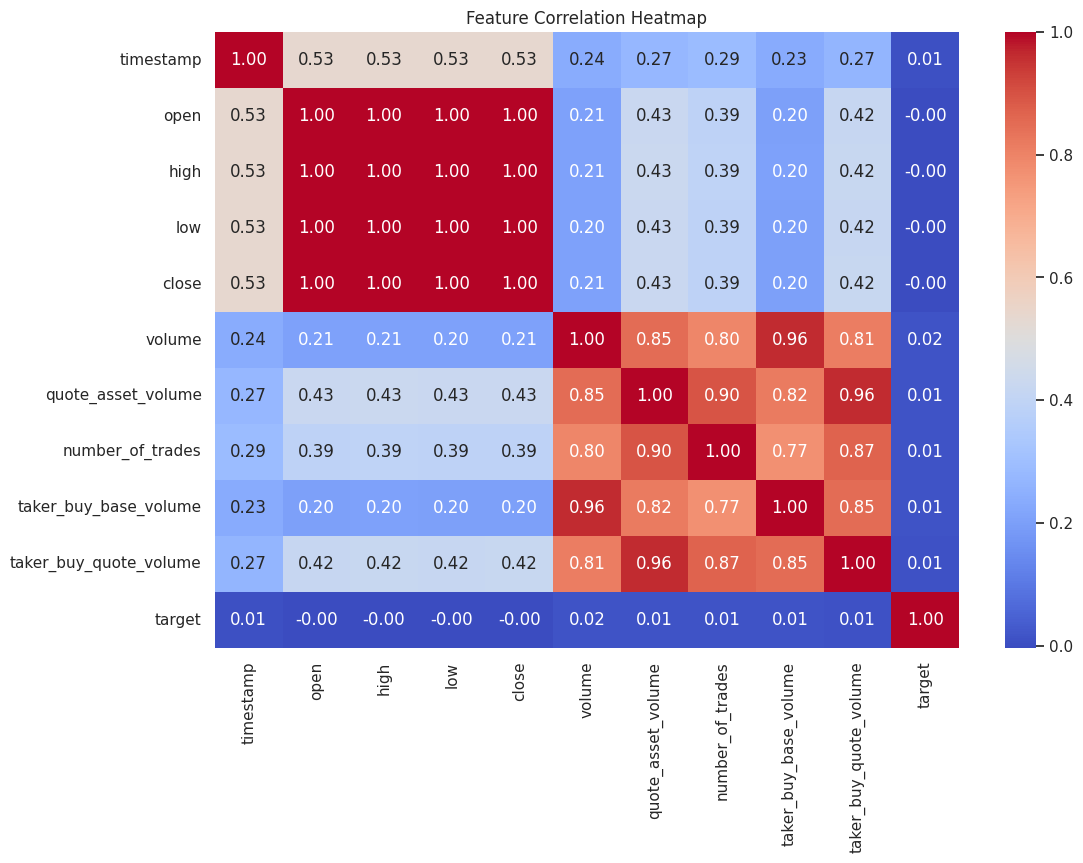

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.59      0.56     22248
         1.0       0.48      0.42      0.45     20201

    accuracy                           0.51     42449
   macro avg       0.50      0.50      0.50     42449
weighted avg       0.50      0.51      0.50     42449

Validation Accuracy: 0.5074560060307663
F1 Score: 0.5042930223377894
Test Data Head:
   row_id   timestamp    open    high     low   close    volume  \
0       0  1652817480  0.4306  0.4308  0.4301  0.4301  101150.0   
1       1  1652817540  0.4301  0.4303  0.4293  0.4302  275647.0   
2       2  1652817600  0.4302  0.4302  0.4292  0.4299  134959.0   
3       3  1652817660  0.4299  0.4303  0.4299  0.4301  316209.0   
4       4  1652817720  0.4302  0.4307  0.4302  0.4303  107440.0   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          43542.2629             105.0                46109.0   
1         118478.9689         

In [54]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # Library for statistical data visualization
from sklearn.model_selection import train_test_split  # Function for splitting data
from sklearn.impute import SimpleImputer  # Class for imputing missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Classes for scaling and encoding features
from sklearn.compose import ColumnTransformer  # Class for applying different preprocessing to different columns
from sklearn.pipeline import Pipeline  # Class for creating a pipeline of data processing steps
from sklearn.ensemble import RandomForestClassifier  # Using Random Forest classifier for better accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score  # Functions for evaluating model performance

# Load training data
train_data = pd.read_csv('/content/train.csv')  # Load training data from CSV file
print("Training Data Head:")
print(train_data.head())  # Display the first few rows of the training data

# Check for missing values
print("Missing Values in Training Data:")
print(train_data.isnull().sum())  # Display the count of missing values for each column

# Remove duplicates if any
train_data = train_data.drop_duplicates()  # Remove duplicate rows from the dataset

# Feature Selection: Analyzing correlation to pick key columns
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')  # Heatmap for correlation analysis
plt.title('Feature Correlation Heatmap')
plt.show()

# Limit to top features based on correlation with target variable
# Assuming the target variable is named 'target'
top_features = train_data.corr()['target'].abs().nlargest(10).index  # Top 10 features including target
X = train_data[top_features].drop(columns='target')  # Features (X)
y = train_data['target']  # Target variable (y)

# Limit the size of the dataset for faster execution
X, _, y, _ = train_test_split(X, y, test_size=0.9, random_state=42)  # Reduce dataset size to 10%

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()  # List numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # List categorical features

# Create preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Create a Random Forest model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Include the preprocessing step
    ('classifier', RandomForestClassifier(random_state=42))  # Using Random Forest for better performance
])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on training data
pipeline.fit(X_train, y_train)  # Fit the pipeline to the training data

# Validate the model
y_pred = pipeline.predict(X_val)  # Make predictions on the validation set
print("Classification Report:")
print(classification_report(y_val, y_pred))  # Display the classification report

# Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy of the model
print("Validation Accuracy:", accuracy)  # Print the accuracy score

# Calculate and print the F1 score
f1 = f1_score(y_val, y_pred, average='weighted')  # Calculate the weighted F1 score
print("F1 Score:", f1)  # Print the F1 score

# Load test data
test_data = pd.read_csv('/content/test.csv')  # Load test data from CSV file
print("Test Data Head:")
print(test_data.head())  # Display the first few rows of the test data

# Preprocess test data using the same pipeline
test_predictions = pipeline.predict(test_data.drop(columns='row_id'))  # Predict on test data without 'row_id' column

# Create a DataFrame for submission
submission = pd.DataFrame({
    'row_id': test_data['row_id'],  # Ensure 'row_id' is the correct column name from test data
    'target': test_predictions  # Include the predicted target values
})

# Save the submission DataFrame to a CSV file
submission.to_csv('/content/submission.csv', index=False)  # Save the submission to a CSV file
print("Submission saved to 'submission.csv'.")  # Print statement confirming submission saved


In [55]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.impute import SimpleImputer  # For imputing missing values
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For scaling and encoding features
from sklearn.compose import ColumnTransformer  # For applying different preprocessing steps
from sklearn.pipeline import Pipeline  # For creating a preprocessing pipeline
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import classification_report, accuracy_score, f1_score  # For evaluating model performance
from sklearn.ensemble import IsolationForest  # For outlier detection

# Load training data
train_data = pd.read_csv('/content/train.csv')  # Load training data
print("Training Data Head:")
print(train_data.head())  # Display the first few rows of the training data

# Step 1: Remove duplicates
train_data = train_data.drop_duplicates()  # Remove duplicate rows

# Step 2: Handle missing values
missing_threshold = 0.3  # Define a threshold for missing values (30%)
train_data = train_data.loc[:, train_data.isnull().mean() < missing_threshold]  # Remove columns exceeding the threshold

# Step 3: Remove rows with any missing values in the target column
train_data = train_data.dropna(subset=['target'])  # Remove rows with missing target values

# Step 4: Remove outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.05, random_state=42)  # Set contamination level (5%)
outliers = outlier_detector.fit_predict(train_data.select_dtypes(include=[np.number]))  # Fit on numerical features
train_data = train_data[outliers != -1]  # Keep only non-outlier rows

# Step 5: Split features and target variable
X = train_data.drop(columns='target')  # Features
y = train_data['target']  # Target variable

# Step 6: Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()  # Numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # Categorical features

# Step 7: Create preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Step 8: Combine preprocessing pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),  # Numerical pipeline
    ('cat', categorical_pipeline, categorical_features)  # Categorical pipeline
])

# Step 9: Create a logistic regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression(max_iter=100, random_state=42, solver='lbfgs'))  # Logistic Regression
])

# Step 10: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data

# Step 11: Fit the model on training data
pipeline.fit(X_train, y_train)  # Fit pipeline

# Step 12: Validate the model
y_pred = pipeline.predict(X_val)  # Make predictions
print("Classification Report:")
print(classification_report(y_val, y_pred))  # Classification report

# Step 13: Calculate and print accuracy and F1 score
accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy
print("Validation Accuracy:", accuracy)  # Print accuracy
f1 = f1_score(y_val, y_pred, average='weighted')  # Calculate F1 score
print("F1 Score:", f1)  # Print F1 score

# Step 14: Load test data
test_data = pd.read_csv('/content/test.csv')  # Load test data
print("Test Data Head:")
print(test_data.head())  # Display the first few rows of the test data

# Step 15: Preprocess test data using the same pipeline
test_predictions = pipeline.predict(test_data.drop(columns='row_id'))  # Predict on test data

# Step 16: Create a DataFrame for submission
submission = pd.DataFrame({
    'row_id': test_data['row_id'],  # Ensure 'row_id' is included
    'target': test_predictions  # Include predictions
})

# Step 17: Save the submission DataFrame to a CSV file
submission.to_csv('/content/submission.csv', index=False)  # Save submission
print("Submission saved to 'submission.csv'.")  # Confirmation


Training Data Head:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     

Training Data Head:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.428900     

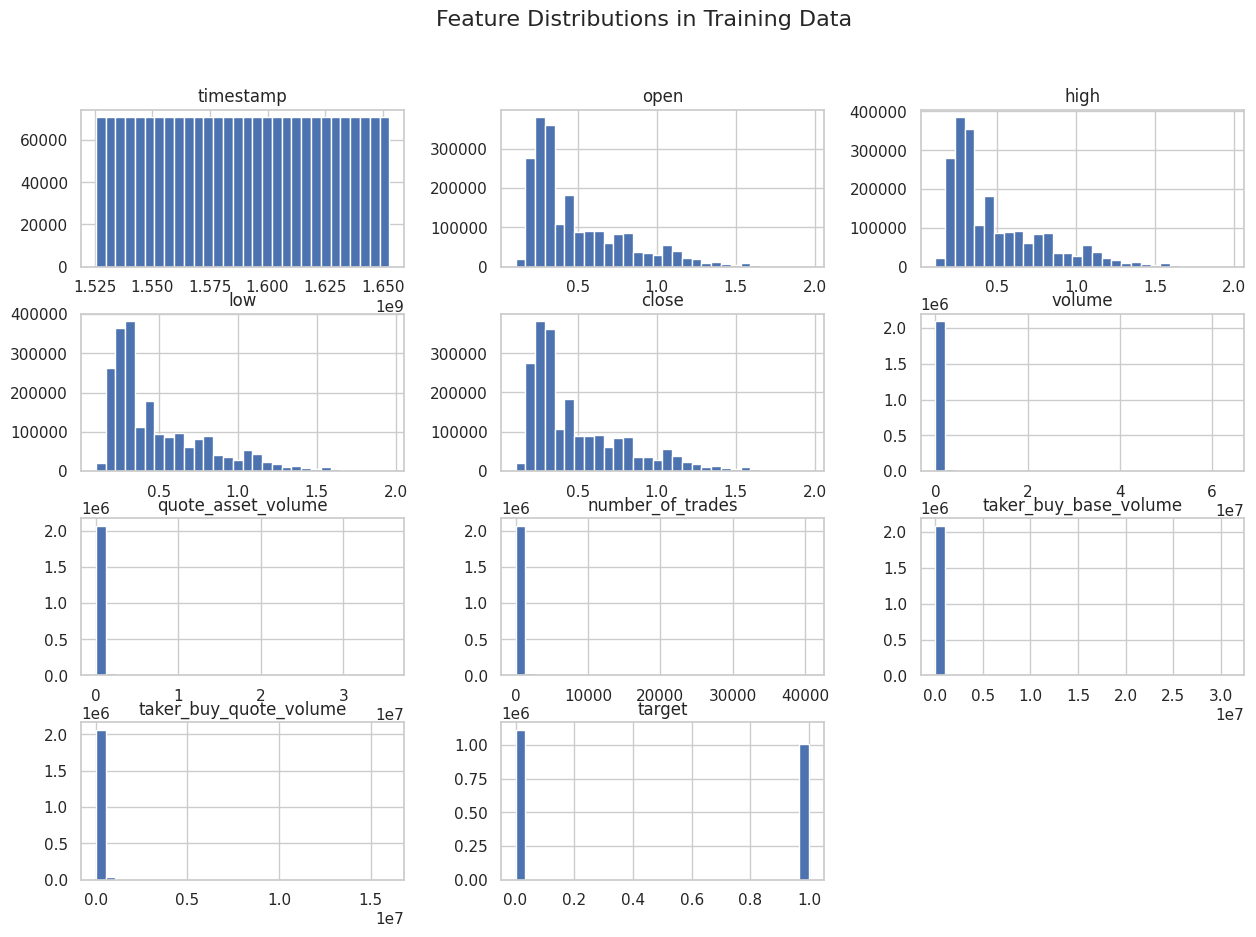

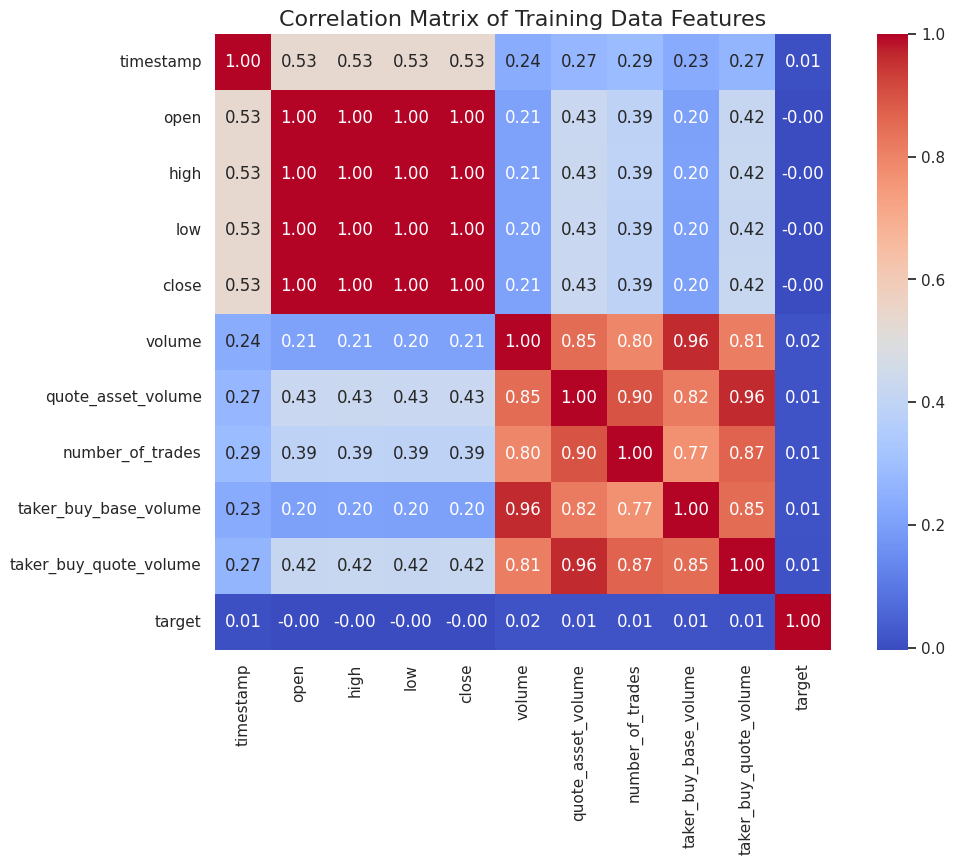

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Step 1: Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Step 2: Inspect the training dataset
print("Training Data Head:")
print(train_data.head())
print("\nTraining Data Info:")
print(train_data.info())
print("\nTraining Data Description:")
print(train_data.describe())

# Step 3: Inspect the test dataset
print("\nTest Data Head:")
print(test_data.head())
print("\nTest Data Info:")
print(test_data.info())
print("\nTest Data Description:")
print(test_data.describe())

# Step 4: Check for missing values in both datasets
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

# Step 5: Check for duplicates
print("\nDuplicate Rows in Training Data:")
print(train_data.duplicated().sum())
print("\nDuplicate Rows in Test Data:")
print(test_data.duplicated().sum())

# Step 6: Visualize distributions of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot style
sns.set(style="whitegrid")

# Visualize the distribution of numerical features in the training data
train_data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions in Training Data', fontsize=16)
plt.show()

# Step 7: Correlation matrix for numerical features
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Training Data Features', fontsize=16)
plt.show()


In [58]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Display the first few rows of the training dataset
print("Training Data - First 5 Rows:")
print(train_data.head())

# Display the shape of the training dataset
print("\nTraining Data Shape:", train_data.shape)

# Display the data types of each column
print("\nTraining Data Types:")
print(train_data.dtypes)

# Display the summary statistics of the training dataset
print("\nTraining Data Summary Statistics:")
print(train_data.describe())

# Display the first few rows of the testing dataset
print("\nTesting Data - First 5 Rows:")
print(test_data.head())

# Display the shape of the testing dataset
print("\nTesting Data Shape:", test_data.shape)

# Display the data types of each column
print("\nTesting Data Types:")
print(test_data.dtypes)

# Display the summary statistics of the testing dataset
print("\nTesting Data Summary Statistics:")
print(test_data.describe())


Training Data - First 5 Rows:
    timestamp     open     high      low    close   volume  \
0  1525471260  0.90120  0.90130  0.90120  0.90130   134.98   
1  1525471320  0.90185  0.90195  0.90185  0.90195  1070.54   
2  1525471380  0.90140  0.90140  0.90139  0.90139  2293.06   
3  1525471440  0.90139  0.90140  0.90138  0.90139  6850.59   
4  1525471500  0.90139  0.90139  0.90130  0.90130   832.30   

   quote_asset_volume  number_of_trades  taker_buy_base_volume  \
0          121.646459               4.0                 125.08   
1          965.505313              12.0                 879.94   
2         2066.963991               5.0                   0.00   
3         6175.000909              19.0                1786.30   
4          750.222624               3.0                 784.82   

   taker_buy_quote_volume  target  
0              112.723589     1.0  
1              793.612703     0.0  
2                0.000000     0.0  
3             1610.149485     0.0  
4              707.4

In [59]:
pip install pandas scikit-learn


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load Data
train_data_path = "/content/train.csv"  # Update with your training data path
test_data_path = "/content/test.csv"  # Update with your testing data path

# Load datasets
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# 2. Data Preprocessing
# Convert timestamp to datetime if needed
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'], unit='s')
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'], unit='s')

# Drop unnecessary columns from the training data (if applicable)
train_data.drop(columns=['row_id', 'timestamp'], inplace=True, errors='ignore')

# 3. Use a Smaller Subset of the Dataset
train_data_subset = train_data.sample(frac=0.05, random_state=42)  # Use 5% of the data

# 4. Features and Target Variable
X = train_data_subset.drop(columns=['target'])
y = train_data_subset['target']

# 5. Train-Test Split (optional if you already have a test set)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training with fewer estimators
model = RandomForestClassifier(n_estimators=10, random_state=42)  # Reduced number of trees
model.fit(X_train, y_train)

# 7. Model Evaluation
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# 8. Prepare Submission
# Prepare the test dataset (drop any unnecessary columns)
test_data.drop(columns=['row_id', 'timestamp'], inplace=True, errors='ignore')
X_test = test_data

# Make predictions on the test dataset
test_predictions = model.predict(X_test)

# Save the predictions to a submission file
submission = pd.DataFrame({
    'row_id': test_data['row_id'],
    'target': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Validation Accuracy: 0.5115194346289753
              precision    recall  f1-score   support

         0.0       0.53      0.65      0.59     11228
         1.0       0.47      0.35      0.40      9997

    accuracy                           0.51     21225
   macro avg       0.50      0.50      0.50     21225
weighted avg       0.50      0.51      0.50     21225



KeyError: 'row_id'

In [63]:
# Prepare the test dataset (drop any unnecessary columns)
# Ensure 'row_id' is included if it's part of your test dataset; otherwise, create one
if 'row_id' in test_data.columns:
    test_data.drop(columns=['row_id', 'timestamp'], inplace=True, errors='ignore')
else:
    test_data.drop(columns=['timestamp'], inplace=True, errors='ignore')
    # Optionally create a row_id based on the index if needed
    row_ids = test_data.index.tolist()

# Make predictions on the test dataset
test_predictions = model.predict(test_data)

# Save the predictions to a submission file
submission = pd.DataFrame({
    'row_id': row_ids,  # Use the index as row_ids if 'row_id' column is not present
    'target': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
